In [101]:
# Load the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import pylab as py
%matplotlib inline

Drop the Column 'tweet_text'

In [54]:
df_tweets = df_tweets[['cyberbullying_type', 'harass', 'cyberstalk', 'flaming', 'outing', 'doxing', 'exclusion', 'impersonation', 'trolling', 'hateSpeech', 'threats', 'word_count', 'char_count', 'avg_word_length', 'avg_sentence_length', 'punctuation_count']]

In [55]:
df_tweets['cyberbullying_type'].unique()

array(['not_cyberbullying', 'gender', 'religion', 'other_cyberbullying',
       'age', 'ethnicity'], dtype=object)

# Data Cleaning and Preparation
This step is in the File Folder "04_Data Cleansing".

# Declaration of the data

In [56]:
df_tweets.shape

(47692, 16)

In [57]:
df_tweets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47692 entries, 0 to 47691
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   cyberbullying_type   47692 non-null  object 
 1   harass               47692 non-null  float64
 2   cyberstalk           47692 non-null  float64
 3   flaming              47692 non-null  float64
 4   outing               47692 non-null  float64
 5   doxing               47692 non-null  float64
 6   exclusion            47692 non-null  float64
 7   impersonation        47692 non-null  float64
 8   trolling             47692 non-null  float64
 9   hateSpeech           47692 non-null  float64
 10  threats              47692 non-null  float64
 11  word_count           47692 non-null  int64  
 12  char_count           47692 non-null  int64  
 13  avg_word_length      47692 non-null  float64
 14  avg_sentence_length  47692 non-null  float64
 15  punctuation_count    47692 non-null 

# Non Graphical Univariate EDA

### Summary statistics of numeric variables

In [58]:
df_tweets[['harass', 'cyberstalk', 'flaming', 'outing', 'doxing', 'exclusion', 'impersonation', 'trolling', 
           'hateSpeech', 'threats', 'word_count', 'char_count', 'avg_word_length', 'avg_sentence_length', 'punctuation_count']].describe()

,harass,cyberstalk,flaming,outing,doxing,exclusion,impersonation,trolling,hateSpeech,threats,word_count,char_count,avg_word_length,avg_sentence_length,punctuation_count
count,47692.000000,47692.000000,47692.000000,47692.000000,47692.000000,47692.000000,47692.000000,47692.000000,47692.000000,47692.000000,47692.000000,47692.000000,47692.000000,47692.000000,47692.000000
mean,0.061247,0.036736,0.011113,0.008765,0.017445,0.004298,0.011050,0.015516,0.102344,0.025644,23.704835,136.247127,4.041031,16.387283,5.629078
std,0.239786,0.188114,0.104832,0.093209,0.130925,0.065422,0.104538,0.123595,0.303104,0.158072,15.434881,85.042305,0.969974,10.447742,4.885243
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,13.000000,78.000000,3.566667,9.333333,3.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,20.000000,124.000000,3.929825,13.633333,5.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,32.000000,180.000000,4.358491,21.000000,8.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,790.000000,4962.000000,86.000000,84.000000,303.000000


### Quantiles
As the colums only have the value 0 or 1, the Quantiles are set accordingly.

In [59]:
df_tweets[['harass', 'cyberstalk', 'flaming', 'outing', 'doxing', 'exclusion', 'impersonation', 'trolling', 'hateSpeech', 'threats', 'word_count', 'char_count', 'avg_word_length', 'avg_sentence_length', 'punctuation_count']].quantile(q=[0.05, 0.10, 0.25, 0.50, 0.75, 0.90, 0.95], axis=0, numeric_only=True).round(2)

,harass,cyberstalk,flaming,outing,doxing,exclusion,impersonation,trolling,hateSpeech,threats,word_count,char_count,avg_word_length,avg_sentence_length,punctuation_count
0.05,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,33.0,3.07,5.00,0.0
0.10,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8.0,47.0,3.26,6.50,1.0
0.25,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,13.0,78.0,3.57,9.33,3.0
0.50,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,20.0,124.0,3.93,13.63,5.0
0.75,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,32.0,180.0,4.36,21.00,8.0
0.90,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,47.0,269.0,4.88,29.00,11.0
0.95,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,51.0,277.0,5.29,36.00,13.0


### Measures of dispersion

In [60]:
df_tweets[['harass', 'cyberstalk', 'flaming', 'outing', 'doxing', 'exclusion', 'impersonation', 'trolling', 'hateSpeech', 'threats', 'word_count', 'char_count', 'avg_word_length', 'avg_sentence_length', 'punctuation_count']].var()

harass                    0.057497
cyberstalk                0.035387
flaming                   0.010990
outing                    0.008688
doxing                    0.017141
exclusion                 0.004280
impersonation             0.010928
trolling                  0.015276
hateSpeech                0.091872
threats                   0.024987
word_count              238.235557
char_count             7232.193692
avg_word_length           0.940850
avg_sentence_length     109.155305
punctuation_count        23.865601
dtype: float64

In [61]:
df_tweets[['harass', 'cyberstalk', 'flaming', 'outing', 'doxing', 'exclusion', 'impersonation', 'trolling', 'hateSpeech', 'threats', 'word_count', 'char_count', 'avg_word_length', 'avg_sentence_length', 'punctuation_count']].std()

harass                  0.239786
cyberstalk              0.188114
flaming                 0.104832
outing                  0.093209
doxing                  0.130925
exclusion               0.065422
impersonation           0.104538
trolling                0.123595
hateSpeech              0.303104
threats                 0.158072
word_count             15.434881
char_count             85.042305
avg_word_length         0.969974
avg_sentence_length    10.447742
punctuation_count       4.885243
dtype: float64

### Skewness

In [62]:
df_tweets[['harass', 'cyberstalk', 'flaming', 'outing', 'doxing', 'exclusion', 'impersonation', 'trolling', 'hateSpeech', 'threats', 'word_count', 'char_count', 'avg_word_length', 'avg_sentence_length', 'punctuation_count']].skew()

harass                  3.659695
cyberstalk              4.925558
flaming                 9.327466
outing                 10.540945
doxing                  7.371790
exclusion              15.154625
impersonation           9.354883
trolling                7.840171
hateSpeech              2.624004
threats                 6.002041
word_count              6.119626
char_count              8.214746
avg_word_length        22.047368
avg_sentence_length     1.744956
punctuation_count      10.866016
dtype: float64

The skewness of the values are <0, which means they're right-skewed.

### Kurtosis

In [63]:
df_tweets[['harass', 'cyberstalk', 'flaming', 'outing', 'doxing', 'exclusion', 'impersonation', 'trolling', 'hateSpeech', 'threats', 'word_count', 'char_count', 'avg_word_length', 'avg_sentence_length', 'punctuation_count']].kurtosis()

harass                   11.393849
cyberstalk               22.262058
flaming                  85.005181
outing                  109.116101
doxing                   52.345484
exclusion               227.672214
impersonation            85.517418
trolling                 59.470770
hateSpeech                4.885599
threats                  34.025923
word_count              230.725984
char_count              364.846679
avg_word_length        1434.288616
avg_sentence_length       3.949329
punctuation_count       501.142936
dtype: float64

The kurtosis values are all pretty high, which means they have a high peak.

### Extreme values
Because the fields only have the values 0 or 1, there are no extreme values.

In [64]:
for column in df_tweets.columns:
    # Get unique values in the current column
    unique_values = df_tweets[column].unique()
    
    # Print the column name and its unique values
    print(f"Unique values in '{column}' column:{unique_values}\n")

Unique values in 'cyberbullying_type' column:['not_cyberbullying' 'gender' 'religion' 'other_cyberbullying' 'age'
 'ethnicity']

Unique values in 'harass' column:[0. 1.]

Unique values in 'cyberstalk' column:[0. 1.]

Unique values in 'flaming' column:[0. 1.]

Unique values in 'outing' column:[0. 1.]

Unique values in 'doxing' column:[0. 1.]

Unique values in 'exclusion' column:[0. 1.]

Unique values in 'impersonation' column:[0. 1.]

Unique values in 'trolling' column:[0. 1.]

Unique values in 'hateSpeech' column:[0. 1.]

Unique values in 'threats' column:[0. 1.]

Unique values in 'word_count' column:[  9  14  18  23  10   6   2  15  20  12  11  21  24   8   5  16  26  19
   4   7  25   3  22  13  17  28   1  27  29 289  31  30  32 181 133  58
  51  52  39  33  47  49  40  50  48  55  46  35  56  37  38  45  44  42
  34  41  43  36  59  53  63  54  57 237  64  62  61 196  60 211  96 692
 159 135 790 206 505 276  76  65 329 125 283 204]

Unique values in 'char_count' column:[  61  115  

# Non Graphical Multivariate EDA

### Cross-tabulation

In [65]:
pd.crosstab(df_tweets['harass'], df_tweets['cyberbullying_type'])

cyberbullying_type,age,ethnicity,gender,not_cyberbullying,other_cyberbullying,religion
harass,,,,,,
0.0,7318,7829,7472,7120,7407,7625
1.0,674,132,501,825,416,373


### Pivot Tables

In [109]:
pd.pivot_table(df_tweets[['cyberbullying_type', 'harass', 'cyberstalk', 'flaming', 'outing', 'doxing', 'exclusion', 'impersonation', 'trolling', 'hateSpeech', 'threats', 'word_count', 'char_count', 'avg_word_length', 'avg_sentence_length', 'punctuation_count']],
               index=['cyberbullying_type'],
               values=['harass', 'cyberstalk', 'flaming', 'outing', 'doxing', 'exclusion', 'impersonation', 'trolling', 'hateSpeech', 'threats', 'word_count', 'char_count', 'avg_word_length', 'avg_sentence_length', 'punctuation_count'],
               aggfunc=np.mean)

/var/folders/y8/blsng9yn0_jdwkc6k9fx0f240000gn/T/ipykernel_19147/2468566871.py:1: FutureWarning: The provided callable <function mean at 0x1057244a0> is currently using DataFrameGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  pd.pivot_table(df_tweets[['cyberbullying_type', 'harass', 'cyberstalk', 'flaming', 'outing', 'doxing', 'exclusion', 'impersonation', 'trolling', 'hateSpeech', 'threats', 'word_count', 'char_count', 'avg_word_length', 'avg_sentence_length', 'punctuation_count']],


,avg_sentence_length,avg_word_length,char_count,cyberstalk,doxing,exclusion,flaming,harass,hateSpeech,impersonation,outing,punctuation_count,threats,trolling,word_count
cyberbullying_type,,,,,,,,,,,,,,,
age,20.805341,3.915636,173.541166,0.040415,0.016892,0.009009,0.008008,0.084334,0.062187,0.013639,0.012262,4.335961,0.029404,0.012513,32.366366
ethnicity,17.549662,3.869632,139.315161,0.032157,0.011556,0.002763,0.012310,0.016581,0.124482,0.007662,0.005150,5.926768,0.011682,0.009923,24.889084
gender,17.415393,3.997802,136.418914,0.035620,0.014173,0.004139,0.027217,0.062837,0.256867,0.011163,0.005268,6.408002,0.036498,0.026841,23.541452
not_cyberbullying,11.967228,4.091632,83.102329,0.030082,0.013090,0.002014,0.003021,0.103839,0.029201,0.002391,0.006293,4.986029,0.013593,0.012587,13.644682
other_cyberbullying,11.577494,4.105437,85.690784,0.030679,0.021475,0.001534,0.003963,0.053177,0.038988,0.004091,0.010610,5.316886,0.012911,0.021859,14.100345
religion,18.885954,4.266771,197.998750,0.051263,0.027507,0.006252,0.012003,0.046637,0.101025,0.027132,0.013003,6.792573,0.049387,0.009502,33.421730


### Correlation Matrix

In [74]:
df_tweets[['harass', 'cyberstalk', 'flaming', 'outing', 'doxing', 'exclusion', 'impersonation', 'trolling', 'hateSpeech', 'threats', 'word_count', 'char_count', 'avg_word_length', 'avg_sentence_length', 'punctuation_count']].corr()

,harass,cyberstalk,flaming,outing,doxing,exclusion,impersonation,trolling,hateSpeech,threats,word_count,char_count,avg_word_length,avg_sentence_length,punctuation_count
harass,1.000000,0.011015,0.047997,0.004127,0.016726,0.011287,0.001441,0.045760,-0.003158,0.141120,0.092037,0.104870,0.038776,0.040264,0.065111
cyberstalk,0.011015,1.000000,-0.001563,0.006750,0.000371,0.019541,0.013478,0.007049,0.008713,0.011333,0.073099,0.084069,0.019165,0.048286,0.054278
flaming,0.047997,-0.001563,1.000000,-0.003531,0.004207,0.002207,0.004101,0.253717,0.098825,0.011906,0.081413,0.083164,-0.003163,0.037975,0.035031
outing,0.004127,0.006750,-0.003531,1.000000,0.477168,0.017892,0.011580,0.002756,-0.005774,0.013208,0.050886,0.056613,0.010212,0.019254,0.022244
doxing,0.016726,0.000371,0.004207,0.477168,1.000000,-0.001411,0.060985,-0.001179,-0.002721,0.011818,0.079021,0.086879,0.015390,0.038477,0.038278
exclusion,0.011287,0.019541,0.002207,0.017892,-0.001411,1.000000,0.002253,0.007311,0.008480,0.015700,0.068930,0.074793,0.005818,0.029557,0.035824
impersonation,0.001441,0.013478,0.004101,0.011580,0.060985,0.002253,1.000000,-0.000287,0.000705,0.004423,0.073768,0.075498,0.000707,0.042684,0.023012
trolling,0.045760,0.007049,0.253717,0.002756,-0.001179,0.007311,-0.000287,1.000000,0.070113,0.013978,0.056787,0.063970,0.012622,0.035687,0.043148
hateSpeech,-0.003158,0.008713,0.098825,-0.005774,-0.002721,0.008480,0.000705,0.070113,1.000000,0.018308,0.132194,0.135509,-0.017772,0.081356,0.077933
threats,0.141120,0.011333,0.011906,0.013208,0.011818,0.015700,0.004423,0.013978,0.018308,1.000000,0.105468,0.119285,0.026955,0.049708,0.056741


### Covariance Matrix

In [75]:
df_tweets[['harass', 'cyberstalk', 'flaming', 'outing', 'doxing', 'exclusion', 'impersonation', 'trolling', 'hateSpeech', 'threats', 'word_count', 'char_count', 'avg_word_length', 'avg_sentence_length', 'punctuation_count']].cov()

,harass,cyberstalk,flaming,outing,doxing,exclusion,impersonation,trolling,hateSpeech,threats,word_count,char_count,avg_word_length,avg_sentence_length,punctuation_count
harass,0.057497,0.000497,0.001206,0.000092,0.000525,0.000177,0.000036,0.001356,-0.000230,0.005349,0.340634,2.138499,0.009019,0.100869,0.076271
cyberstalk,0.000497,0.035387,-0.000031,0.000118,0.000009,0.000240,0.000265,0.000164,0.000497,0.000337,0.212244,1.344909,0.003497,0.094899,0.049881
flaming,0.001206,-0.000031,0.010990,-0.000034,0.000058,0.000015,0.000045,0.003287,0.003140,0.000197,0.131732,0.741419,-0.000322,0.041592,0.017940
outing,0.000092,0.000118,-0.000034,0.008688,0.005823,0.000109,0.000113,0.000032,-0.000163,0.000195,0.073208,0.448758,0.000923,0.018750,0.010129
doxing,0.000525,0.000009,0.000058,0.005823,0.017141,-0.000012,0.000835,-0.000019,-0.000108,0.000245,0.159686,0.967319,0.001954,0.052632,0.024483
exclusion,0.000177,0.000240,0.000015,0.000109,-0.000012,0.004280,0.000015,0.000059,0.000168,0.000162,0.069605,0.416123,0.000369,0.020202,0.011450
impersonation,0.000036,0.000265,0.000045,0.000113,0.000835,0.000015,0.010928,-0.000004,0.000022,0.000073,0.119028,0.671191,0.000072,0.046619,0.011752
trolling,0.001356,0.000164,0.003287,0.000032,-0.000019,0.000059,-0.000004,0.015276,0.002627,0.000273,0.108331,0.672373,0.001513,0.046082,0.026053
hateSpeech,-0.000230,0.000497,0.003140,-0.000163,-0.000108,0.000168,0.000022,0.002627,0.091872,0.000877,0.618454,3.492960,-0.005225,0.257633,0.115398
threats,0.005349,0.000337,0.000197,0.000195,0.000245,0.000162,0.000073,0.000273,0.000877,0.024987,0.257323,1.603526,0.004133,0.082092,0.043816


# Graphical Univariate EDA
Most Graphics like Line, Histograms, Density Plots, QQ-Plots or Barcharts don't make sense for the Features, that have the values 0 or 1.

### Density Plot (seaborn)

/var/folders/y8/blsng9yn0_jdwkc6k9fx0f240000gn/T/ipykernel_19147/2867621485.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_tweets['word_count'],
/Users/salomekoller/anaconda3/envs/pga/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/salomekoller/anaconda3/envs/pga/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN bef

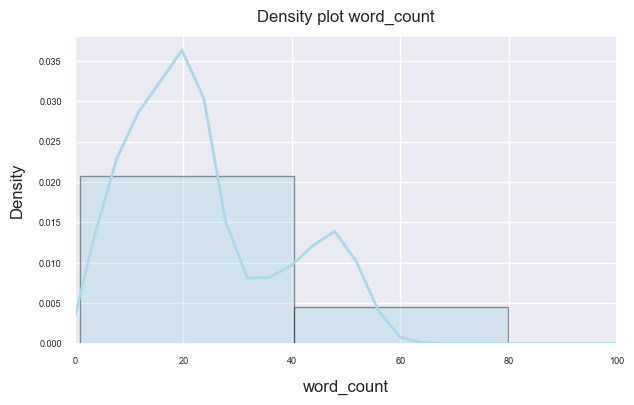

In [91]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(7, 4))
sns.distplot(df_tweets['word_count'], 
             hist=True, 
             kde=True, 
             bins=20, 
             color='lightblue',
             hist_kws={'edgecolor': 'black'},
             kde_kws={'linewidth': 2},
            )

plt.title('Density plot word_count', fontsize=12, pad=10)
plt.xlabel('word_count', fontsize=12, labelpad=10)
plt.ylabel('Density', fontsize=12, labelpad=10)

# Limit x-axis to 100
plt.xlim(0, 100)

plt.grid(True)
plt.show()


### Boxplot (seaborn)
For the Features word_count, char_count, avg_word_length, avg_sentence_length and punctuation_count

/Users/salomekoller/anaconda3/envs/pga/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/salomekoller/anaconda3/envs/pga/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/salomekoller/anaconda3/envs/pga/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


<Axes: xlabel='punctuation_count'>

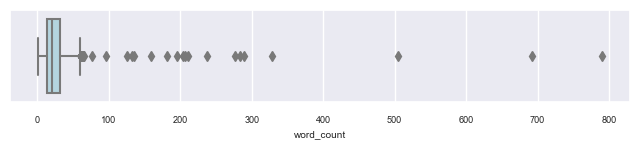

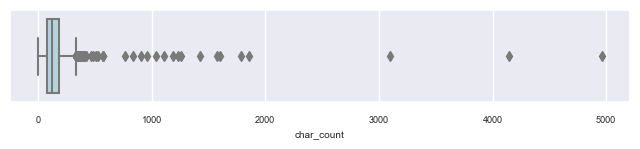

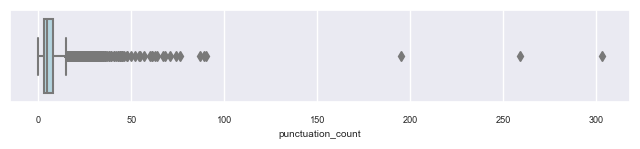

In [90]:
plt.figure(figsize=(8,1.2))
plt.ticklabel_format(style='plain')
sns.boxplot(x=df_tweets['word_count'], color="lightblue")

plt.figure(figsize=(8,1.2))
plt.ticklabel_format(style='plain')
sns.boxplot(x=df_tweets['char_count'], color="lightblue")

plt.figure(figsize=(8,1.2))
plt.ticklabel_format(style='plain')
sns.boxplot(x=df_tweets['punctuation_count'], color="lightblue")

Average Features

/Users/salomekoller/anaconda3/envs/pga/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/salomekoller/anaconda3/envs/pga/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


<Axes: xlabel='avg_sentence_length'>

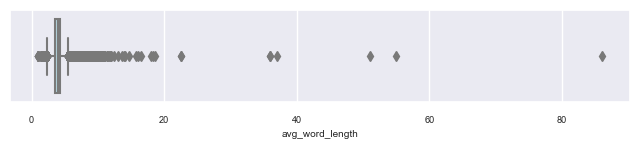

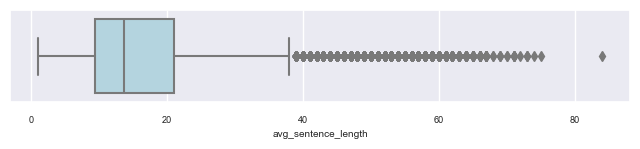

In [84]:
plt.figure(figsize=(8,1.2))
plt.ticklabel_format(style='plain')
sns.boxplot(x=df_tweets['avg_word_length'], color="lightblue")

plt.figure(figsize=(8,1.2))
plt.ticklabel_format(style='plain')
sns.boxplot(x=df_tweets['avg_sentence_length'], color="lightblue")

### Quantile-Quantile (QQ-) plot

       word_count        var
24110           1  -1.471008
6907            1  -1.471008
25006           1  -1.471008
795             1  -1.471008
31396           1  -1.471008
...           ...        ...
1317          289  17.188028
44035         329  19.779560
30752         505  31.182304
24516         692  43.297720
29205         790  49.646975

[47692 rows x 2 columns]


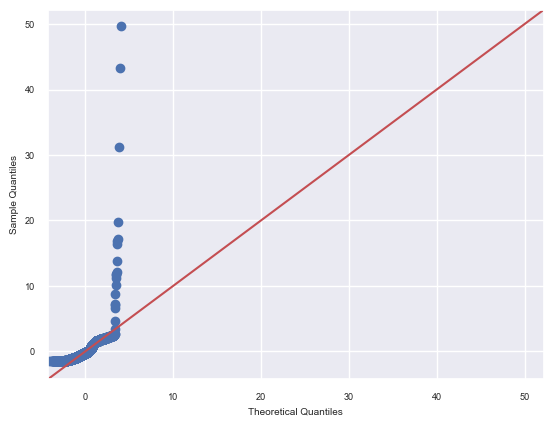

In [102]:
# Variable (standardized)
x = 'word_count'
df_qq = df_tweets
df_qq['var'] = (df_tweets[x]-df_tweets[x].mean()) / df_tweets[x].std()
print(df_qq.sort_values('var')[['word_count', 'var']])
    
# Plot
sm.qqplot(df_qq['var'], line ='45')
py.show()

### Piechart (matplotlib)

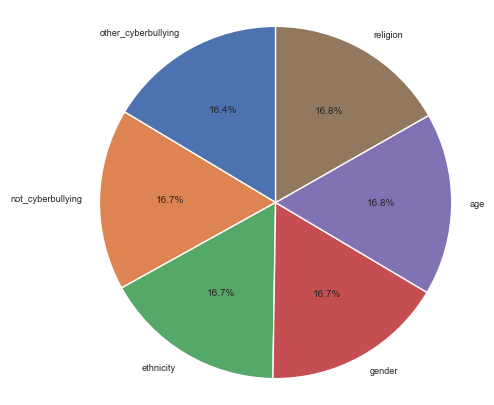

In [70]:
# Group data by rooms (only the 8 most frequently occurencies by rooms)
df_bar = df_tweets.cyberbullying_type.value_counts().nlargest(8).sort_values(ascending=True)

# Simple bar chart
sizes = list(df_bar.values)
labels = list(df_bar.index.values)

fig1, ax1 = plt.subplots(figsize=(5,5))
ax1.pie(sizes, 
        labels=labels, 
        autopct='%1.1f%%',
        shadow=False, 
        startangle=90)
ax1.axis('equal')  # ensures that pie is drawn as a circle.

plt.show()

# Graphical Multivariate EDA
Most Graphics like Scatterplots, Regressionlines, Matrices, Hexagonal binning plots or Correlation heatmaps don't make sense for the 0 or 1 features.

Also for the other features a comparation of the different Features don't give a value. For Example, the below scatterplot shows the correlation of word count and char count. But we can't really draw a further information out of it.

### Scatterplot

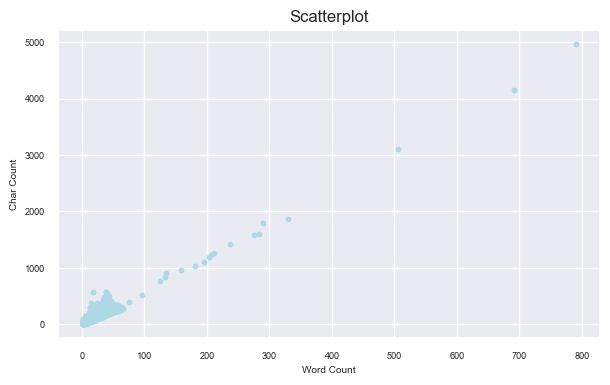

In [107]:
plt.figure(figsize=(7,4))
plt.scatter(df_tweets['word_count'], 
           df_tweets['char_count'], 
           color="lightblue", 
           alpha=1.0,
           s=10)
plt.title('Scatterplot', fontsize=12)
plt.xlabel('Word Count')
plt.ylabel('Char Count')
plt.show()

### Scatterplot-matrix (seaborn)

/Users/salomekoller/anaconda3/envs/pga/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/salomekoller/anaconda3/envs/pga/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/salomekoller/anaconda3/envs/pga/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/salomekoller/anaconda3/envs/pga/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be r

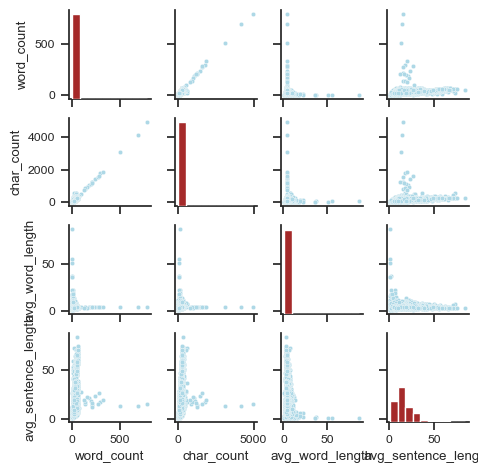

In [108]:
sns.set(style="ticks", font_scale=0.8)
g = sns.PairGrid(df_tweets[['word_count', 
                     'char_count', 
                     'avg_word_length', 
                     'avg_sentence_length']], 
                 height=1.2, 
                 aspect=1)
g.map_upper(sns.scatterplot,color='lightblue', s=10)
g.map_lower(sns.scatterplot, color='lightblue', s=10)
g.map_diag(plt.hist, color='brown')

### Correlation heatmap:

<Axes: >

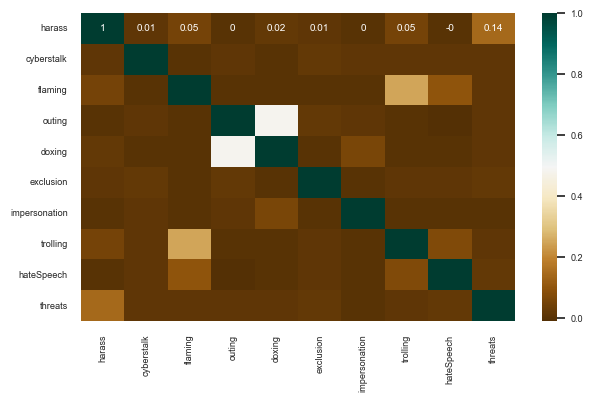

In [71]:
# Set font size for plot
sns.set(font_scale=0.6)

# Create correlation matrix as the basis for the heatmap
plt.figure(figsize=(7,4))
corr = df_tweets[['harass', 'cyberstalk', 'flaming', 'outing', 'doxing', 'exclusion', 'impersonation', 'trolling', 'hateSpeech', 'threats']].corr().round(2)

# Plot heatmap
sns.heatmap(corr, 
            cmap="BrBG", 
            annot=True)